# Draw data analysis images

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2
import numpy as np

def load_OGT_cultivation():
    OGT_cultivation = pd.read_csv('dataset/OGT_cultivation.tsv', sep = '\t')
    OGT_cultivation = OGT_cultivation[['taxid', 'organism', 'temperature']]
    OGT_cultivation = OGT_cultivation.rename(columns  = {'organism':'scientific_name',
                                                   'taxid':'taxonomy_id',
                                                   'temperature':'OGT_cultivation'})
    
    return OGT_cultivation

def histplot(final_df):
    # Create a figure
    fig = plt.figure()

    # Set Seaborn style
    sns.set(style='whitegrid')

    # Define the bins for the histogram (closed on the right, matching Seaborn)
    bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]

    # Plot the histogram
    sns.histplot(data=final_df, x='OGT_journal', bins=bins, kde=False, color='blue', label='OGT_journal', alpha=0.5)

    # Set labels and legend
    plt.xlabel('OGT(℃)')
    plt.ylabel('Count')

    # Show the plot
    plt.show()

    # Save the plot as an SVG file
    fig.savefig('graph/histplot.svg', format='svg', dpi=300)

def vnplot(df):
    fig=plt.figure()
    OGT_cultivation = load_OGT_cultivation()
    common_taxonomy_ids = [value for value in list(df['taxonomy_id']) if value in list(OGT_cultivation['taxonomy_id'])]
    i = 0
    for each in OGT_cultivation['taxonomy_id'].values:
        if each in common_taxonomy_ids:
            i += 1
    j = 0
    for each in df['taxonomy_id'].values:
        if each in common_taxonomy_ids:
            j += 1
    
    num_set = set(common_taxonomy_ids)

    # Calculate the size of the intersection
    size_common = len(common_taxonomy_ids)

    venn = venn2(subsets=(len(df), len(OGT_cultivation), size_common), 
                 set_labels=('OGT_journal', 'OGT_cultivation'),
                 set_colors=('#87CEEB', '#E6E6FA'))

    label_fontsize = 10
    venn.get_label_by_id('100').set_text(f'({len(df) - size_common})')
    venn.get_label_by_id('100').set_fontsize(label_fontsize)

    venn.get_label_by_id('010').set_text(f'({len(OGT_cultivation) - size_common})')
    venn.get_label_by_id('010').set_fontsize(label_fontsize)

    venn.get_label_by_id('110').set_text('{} organisms\n{} descriptions(in journal)\n{} descriptions(in cultivation)'.format(len(num_set),j, i))
    venn.get_label_by_id('110').set_fontsize(8)

    plt.show()
    fig.savefig('graph/vnplot.svg',format='svg',dpi=300)

def pieplot(OGT_journal):
    OGT_journal['OGT_journal'] = OGT_journal.groupby('taxonomy_id')['OGT_journal'].transform('mean')
    OGT_final_mean = OGT_journal.drop_duplicates(subset=['taxonomy_id'])
    print(OGT_final_mean.shape)

    x_values = OGT_final_mean['OGT_journal']
    y_values = OGT_final_mean['OGT_cultivation']

    same_count = sum(x == y for x, y in zip(x_values, y_values))

    diff_5_count = sum(0 < abs(x - y) < 5 for x, y in zip(x_values, y_values))

    diff_gt_5_count = sum(abs(x - y) >= 5 for x, y in zip(x_values, y_values))

    labels = ['Same OGT Value', 'ΔT ＜ 5°C', 'ΔT ≥ 5°C']
    sizes = [same_count, diff_5_count, diff_gt_5_count]
    print(sizes)
    colors = ['#87CEEB', '#9370DB', '#A9A9A9']
    explode = (0.1, 0, 0) 

    fig = plt.figure(figsize=(8, 6)) 

    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

    plt.show()
    fig.savefig('graph/pieplot.svg',format='svg',dpi=300)
    
def histplot_vs(final_df):
    fig = plt.figure() 
    sns.set(style='whitegrid')

    bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]

    ogt_merge_counts, _ = np.histogram(final_df['OGT_journal'], bins=bins)
    ogt_cultivation_counts, _ = np.histogram(final_df['OGT_cultivation'], bins=bins)

    bar_width = 0.45

    x_merge = [x - bar_width / 2 - 0.2 for x in range(len(bins) - 1)]
    x_cultivation = [x + bar_width / 2 - 0.2 for x in range(len(bins) - 1)]

    plt.bar(x_merge, ogt_merge_counts, width=0.45, color='blue', label='OGT_journal', alpha=0.5)
    plt.bar(x_cultivation, ogt_cultivation_counts, width=0.45, color='purple', label='OGT_cultivation', alpha=0.5)

    plt.xlabel('OGT(℃)')
    plt.ylabel('Count')
    plt.xticks(x_merge, [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins) - 1)], rotation=45) 
    plt.legend()
    plt.show()
    fig.savefig('graph/histplot_vs.svg', format='svg', dpi=300)
    
def scatter_plot(data):
    fig = plt.figure(figsize=(12, 12))

    greater_than_10 = data[data['Deviation'] > 15]
    between_5_and_10 = data[(data['Deviation'] > 5) & (data['Deviation'] <= 15)]
    less_than_equal_5 = data[data['Deviation'] <= 5]

    plt.scatter(less_than_equal_5['OGT_journal'], less_than_equal_5['OGT_cultivation'], label='ΔT ≤ 5°C', color='blue')
    plt.scatter(between_5_and_10['OGT_journal'], between_5_and_10['OGT_cultivation'], label='5°C < ΔT ≤ 15°C', color='red')
    plt.scatter(greater_than_10['OGT_journal'], greater_than_10['OGT_cultivation'], label='ΔT > 15°C', color='green')

    top_difference_points = data.nlargest(5, 'Deviation')

    f = 0
    markers = ['s', 'p', 'o', 'v', 'd']
    clos = ['black', 'g', 'r', 'b', 'y']
    for index, row in top_difference_points.iterrows():
        plt.text(120, 6 + f*3, f"{row['scientific_name']} ", color=clos[f], fontsize=14, ha='right')
        plt.scatter(121, 6.3 + f*3, color=clos[f], marker=markers[f], s=150)
        plt.scatter(row['OGT_journal'], row['OGT_cultivation'], color=clos[f], marker=markers[f], s=150)
        f += 1
        
        
    plt.xlabel('OGT_journal')
    plt.ylabel('OGT_cultivation')
    plt.title('OGT_journal vs OGT_cultivation')
    plt.grid(True)

    plt.scatter(-3, 114, color='blue')
    plt.scatter(-3, 111, color='red')
    plt.scatter(-3, 108, color='green')
    plt.text(17, 116, f'counts', color='black')
    plt.text(-1, 113, f'ΔT ≤ 5°C:                    {len(less_than_equal_5)}', color='blue')
    plt.text(-1, 110, f'5°C < ΔT ≤ 15°C:         {len(between_5_and_10)}', color='red')
    plt.text(-1, 107, f'ΔT > 15°C:                    {len(greater_than_10)}', color='green')

    plt.show()
    fig.savefig('graph/scatter_plot.svg',format='svg',dpi=300)
    
    return top_difference_points

## Read data

In [10]:
# OGT_journal
OGT_journal = pd.read_excel('dataset/5_Context_deduplication_2142.xlsx')

# OGT_journal 与 OGT_cultivation Intersection data set
OGT_intersection = pd.read_excel('dataset/6_Deviation_1972.xlsx')

## OGT_journal histogram

C:\Users\XJ_Zhou\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8451 (\N{DEGREE CELSIUS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


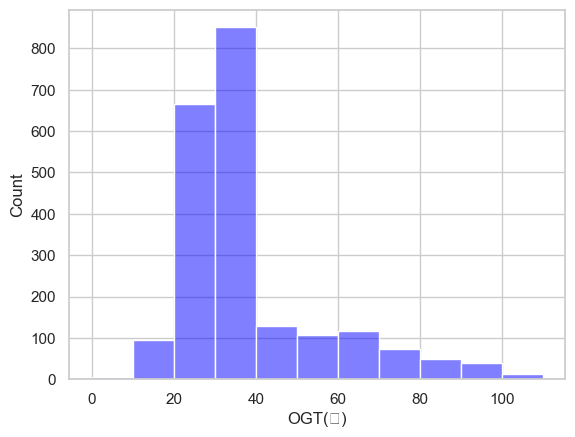

C:\Users\XJ_Zhou\AppData\Local\Temp\ipykernel_20300\1122027634.py:38: UserWarning: Glyph 8451 (\N{DEGREE CELSIUS}) missing from current font.
  fig.savefig('graph/histplot.svg', format='svg', dpi=300)


In [3]:
histplot(OGT_journal)

## VN plots for two data sets

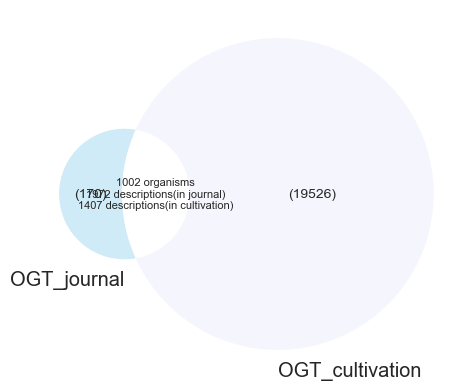

In [18]:
vnplot(OGT_journal)

## Scatter diagram

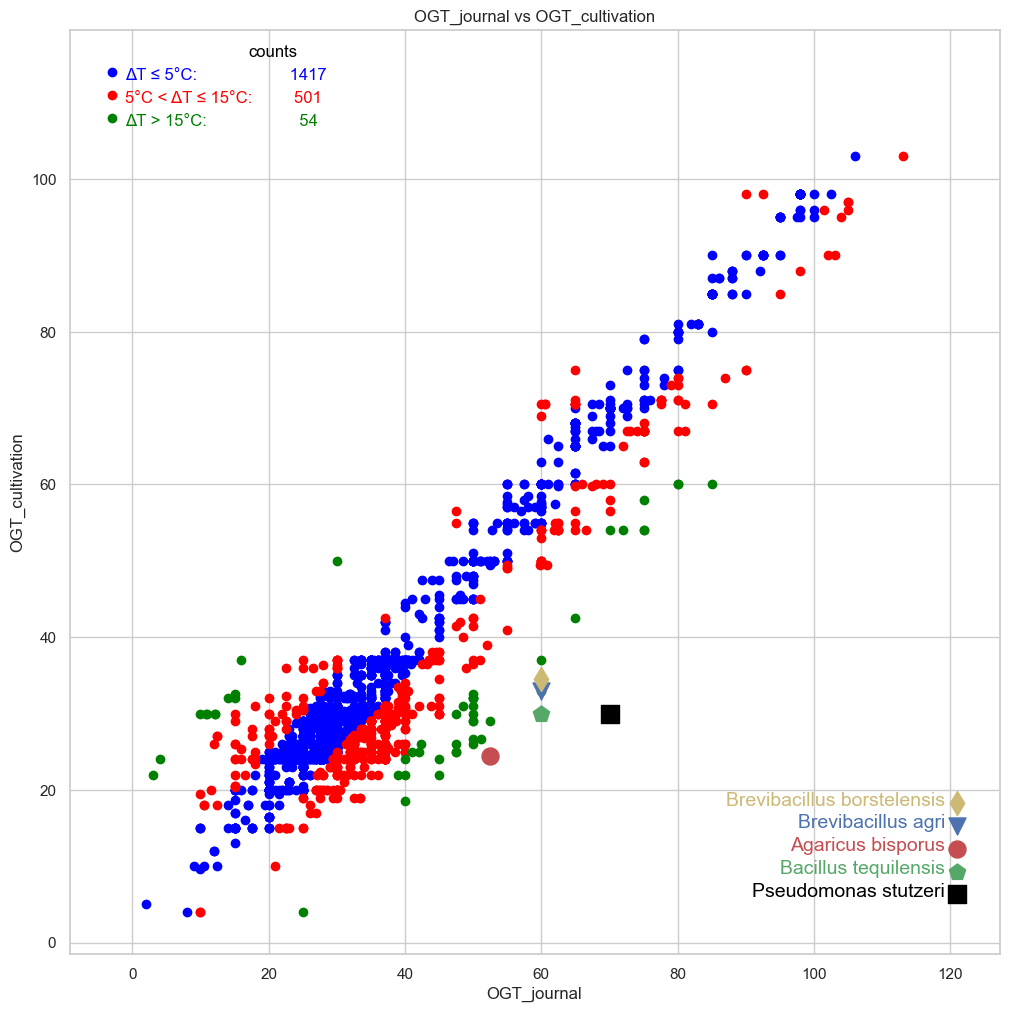

In [12]:
top_difference_points = scatter_plot(OGT_intersection)
top_difference_points.to_excel('dataset/top_5_deviation_points_withQA.xlsx', index = False)

## pieplot

(1002, 6)
[157, 551, 294]


C:\Users\XJ_Zhou\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65308 (\N{FULLWIDTH LESS-THAN SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


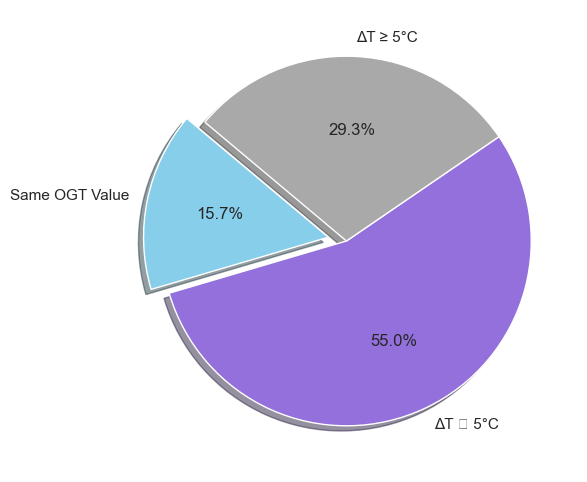

C:\Users\XJ_Zhou\AppData\Local\Temp\ipykernel_20300\1116567164.py:99: UserWarning: Glyph 65308 (\N{FULLWIDTH LESS-THAN SIGN}) missing from current font.
  fig.savefig('graph/pieplot.svg',format='svg',dpi=300)


In [14]:
pieplot(OGT_intersection)

## Columnar contrast chart

C:\Users\XJ_Zhou\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8451 (\N{DEGREE CELSIUS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


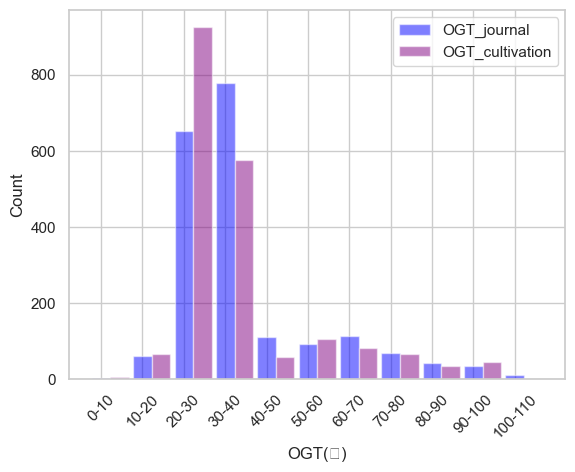

C:\Users\XJ_Zhou\AppData\Local\Temp\ipykernel_20300\1116567164.py:123: UserWarning: Glyph 8451 (\N{DEGREE CELSIUS}) missing from current font.
  fig.savefig('graph/histplot_vs.svg', format='svg', dpi=300)


In [15]:
histplot_vs(OGT_intersection)